In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
warnings.filterwarnings("ignore")

In [3]:
### Loading the olivetti dataset
data, target = datasets.fetch_olivetti_faces(shuffle = True,random_state=8,return_X_y = True)

In [4]:
### Splitting the training set, validation set, stratified sampling
X_train, X_left, y_train, y_left = train_test_split(data,target, train_size=0.7, stratify=target)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=0.6, stratify=y_left)

In [5]:
### Predicting the person
df_olivetti = pd.DataFrame(data)
df_olivetti['target'] = target

### using kFold
KF_olivetti = KFold(n_splits=3)
KF_olivetti

KFold(n_splits=3, random_state=None, shuffle=False)

In [6]:
### Training 
for train_index, test_index in KF_olivetti.split(df_olivetti):
    print(train_index, test_index)
    
def scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

[134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349
 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367
 368 369 370 371 372 373 374 375 376 377 378 379 38

In [7]:
### Classify & predict
clf_logistic = LogisticRegression(random_state=2)
scores(clf_logistic,X_train, X_test, y_train, y_test)
scores(clf_logistic,X_val, X_test, y_val, y_test)

scores(SVC(),X_train, X_test, y_train, y_test)
scores(SVC(),X_val, X_test, y_val, y_test)

0.4583333333333333

In [8]:
### Reducing dimensionality 
reduce_scaler = StandardScaler()
reduce_scaler.fit(df_olivetti)
X_scale = reduce_scaler.transform(df_olivetti)
df_scale = pd.DataFrame(X_scale, columns=df_olivetti.columns)
df_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,-0.934950,-1.115331,-1.386484,-1.615314,-1.892668,-2.282719,-2.411128,-2.740866,-2.939741,-2.499303,...,0.003014,0.253959,0.569333,0.882063,1.400118,1.095583,-0.171417,-0.651257,-0.461075,-1.169500
1,1.400565,1.351781,1.035508,0.888800,0.849614,0.869935,0.757988,0.568537,0.311534,0.036452,...,-1.180002,-1.226850,-1.425827,-1.230130,-0.873475,-0.472259,-0.523833,-0.290730,-0.002978,0.216574
2,1.308976,1.286282,0.993017,0.738981,0.520540,0.591760,0.634195,0.728669,0.844070,0.929729,...,1.891291,1.871457,1.884823,2.082678,1.006611,2.578676,3.154509,3.021603,2.791414,-1.256129
3,0.118321,0.216473,0.313159,0.161109,-0.049855,-0.173222,-0.306637,-0.338880,-0.501285,-0.539856,...,0.526272,0.618465,1.029755,1.482371,1.509425,1.349827,1.304325,1.556966,1.669076,0.909611
4,-0.499903,-0.351181,-0.302961,-0.395361,-0.137608,0.104953,0.213296,0.194895,0.171393,0.065267,...,1.663788,1.598077,1.621725,0.726428,-1.092090,-0.959562,-0.898275,-0.831520,-0.850457,-1.689278


In [9]:
sse = []
kFold_list = range(1, 10)
for k in kFold_list:
    km = KMeans(n_clusters=k)
    km.fit(df_scale)
    sse.append([k, km.inertia_])

Text(0, 0.5, 'Inertia')

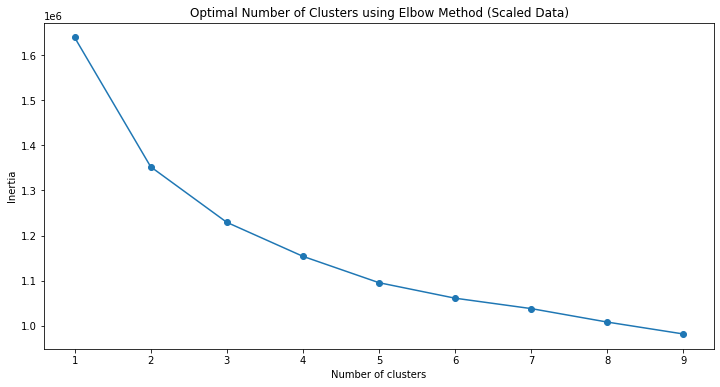

In [10]:
### Plotting elbo graph
oca_results_scale = pd.DataFrame({'Cluster': range(1,10), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [11]:
### Using silhouette to decide number of clusters
X, y = make_blobs(n_samples=400,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.7116932087396148
For n_clusters = 3 The average silhouette_score is : 0.5852917226919694
For n_clusters = 4 The average silhouette_score is : 0.633176703932799
For n_clusters = 5 The average silhouette_score is : 0.5659512616934121
For n_clusters = 6 The average silhouette_score is : 0.48987958673726995


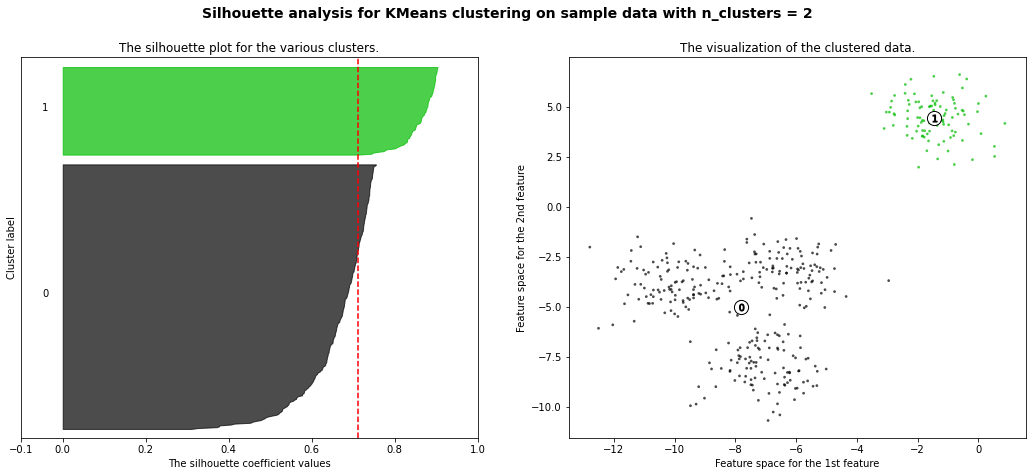

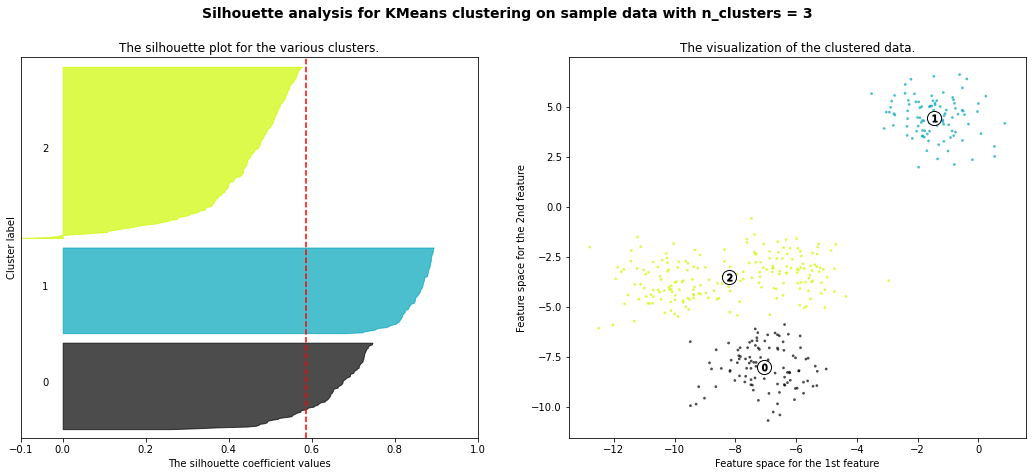

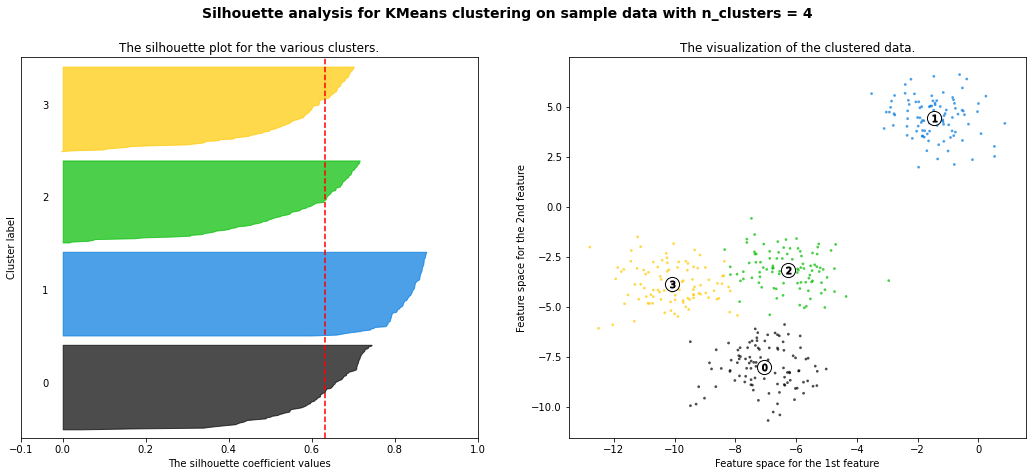

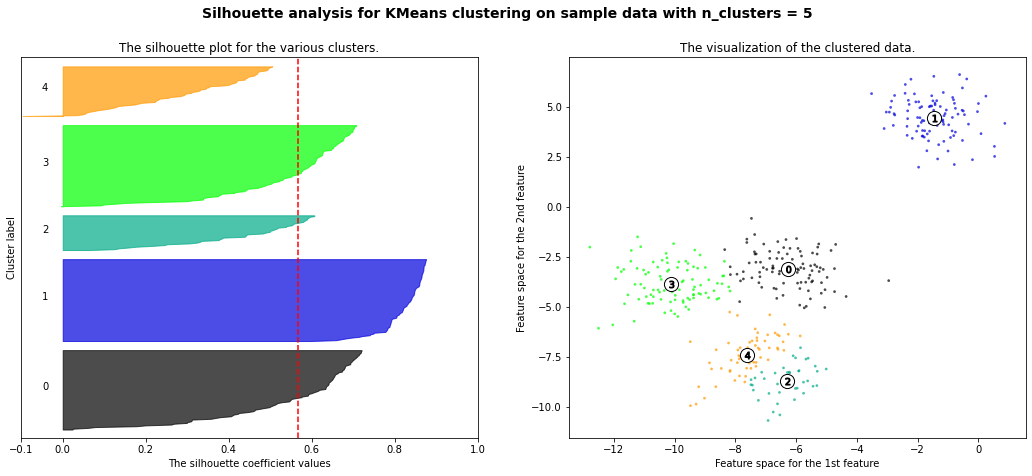

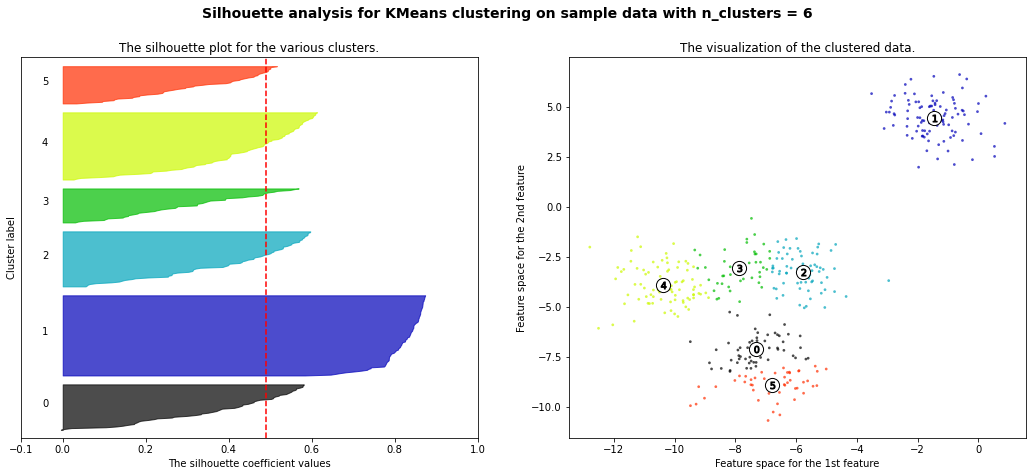

In [12]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample\
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()